In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [23]:
#abrindo os dados
dados_escolares = pd.read_csv('DadosEscolares1996-2015.csv', encoding = 'latin1')
nota = pd.read_csv('ENEM2015.csv')
#agrupando por escolas
dados_escolares = dados_escolares.groupby('CODMEC').mean()
#Apagando a classe desbalanceada
nota = nota[nota.Classificacao != 0]
#Em todos Dataframes temos mais escolas do que o nosso target
dados_escolares = dados_escolares.reset_index()[dados_escolares.reset_index().CODMEC.isin(nota['CODIGO DA ENTIDADE'])]
dados_escolares.drop(dados_escolares.columns[dados_escolares.isnull().mean() != 0], axis=1, inplace = True)
#Alterando o nome da coluna para o merge
nota.rename(columns = {'CODIGO DA ENTIDADE':'CODMEC'}, inplace = True)
#criando o merge com base na coluna CODMEC usando o dataframe target e os dados escolares
new_df = pd.merge(dados_escolares, nota, on = 'CODMEC')
new_df.drop(['CODMEC', 'ANO','NUMERO DE PARTICIPANTES'], axis = 1, inplace = True)
#criando o data e o target
data = new_df.drop('Classificacao', axis = 1)
target = new_df.Classificacao

C:\Users\giova\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6,8,11,17,18,19,20,111,240) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
melhor_score = 0
melhores_colunas = []
while len(data.columns) >= 10:
    lm = LinearRegression()
    scaler = StandardScaler()
    data1 = scaler.fit_transform(data)
    coefs = [0 for x in range(len(data.columns))]
    kf = KFold(5, shuffle = True)
    r = []
    for train_i, test_i in kf.split(data):
        x_train, x_test = data1[train_i], data1[test_i]
        y_train, y_test = target[train_i], target[test_i]
        lm.fit(x_train, y_train)
        r.append(lm.score(x_test, y_test))
        for x in range(len(coefs)):
            coefs[x] = coefs[x] + abs(lm.coef_[x])
    print('Score:',sum(r)/5)
    if sum(r)/5 > melhor_score:
        melhor_score = sum(r)/5
        melhores_colunas = list(data.columns)
    ind = coefs.index(min(coefs))
    print('Smaller coef columns:', data.columns[ind], min(coefs)/5)
    data.drop(data.columns[ind], axis=1, inplace = True)

Score: -2.0321335920924333
Smaller coef columns: EE_Down_EP 0.0
Score: -1.7725487324998894
Smaller coef columns: EE_Ret_EP 0.0
Score: -12.946939276464636
Smaller coef columns: EE_TDI_EP 0.0
Score: -1.4785517054364214
Smaller coef columns: EE_CON_EP 0.0
Score: -0.5219720560394766
Smaller coef columns: EE_OUT_EP 0.0
Score: -0.6006866138046693
Smaller coef columns: EE_CON_PRE 0.0
Score: -2.7509700079743156
Smaller coef columns: EE_OUT_PRE 0.0
Score: -0.5316055664797118
Smaller coef columns: EE_EJA 0.0
Score: -2.2754017706710184e+24
Smaller coef columns: EE_EP 0.0
Score: -0.29049457376574944
Smaller coef columns: EE_OUT_FUND 1.5414336473895674e-13
Score: -0.2900294735899402
Smaller coef columns: EE_CON_EJA 1.3520295993885156e-13
Score: -0.4038324051312639
Smaller coef columns: EE_OUT_EJA 1.6464607455191071e-13
Score: -5.339852450351542e+24
Smaller coef columns: SITUAÃâ¡ÃÆO 3.4927745366257255e-12
Score: -10.990023603481664
Smaller coef columns: EE_Ret_CRE 2.0077273177321332e-13
Score: -

Score: 0.2567924765953671
Smaller coef columns: EE_MEN_FUND 0.03606824639668248
Score: 0.061836930500159884
Smaller coef columns: CLE9FMU 0.035201734285791556
Score: 0.0613021787954768
Smaller coef columns: EE_AUD_CRE 0.033689602242602326
Score: 0.2582489894826846
Smaller coef columns: EE_Asperger_MED 0.037833407637709246
Score: 0.2788261020845507
Smaller coef columns: >6 0.037992464733884644
Score: 0.03070756610411447
Smaller coef columns: EE_Asperger_FUND 0.036931103871085065
Score: 0.28775556663975527
Smaller coef columns: ALES1A4_SEMI 0.045232017337847936
Score: -0.015844770751982828
Smaller coef columns: ALESMED_SEMI 0.022731107698564068
Score: 0.27275955608322866
Smaller coef columns: EE_SUP_FUND 0.046740793434877116
Score: -0.000423730354334817
Smaller coef columns: EE_BAUD_EJA 0.0505297270438826
Score: 0.17469636011873915
Smaller coef columns: TOT_EE_MED 0.05356667000215132
Score: 0.17171225283762614
Smaller coef columns: TOT_EE_EJA 0.033389951474644214
Score: 0.100179969274149

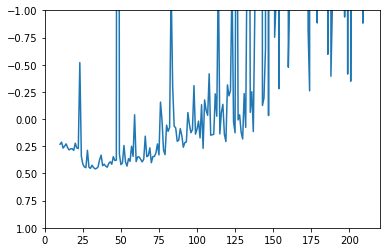

In [12]:
plt.plot(*zip(*v))
plt.ylim(1,-1)
plt.show()

In [17]:
v.sort(key=lambda x:x[1])

In [18]:
v

[(200, -1.605331795846431e+25),
 (210, -1.3871134789456355e+25),
 (198, -3.604194975402703e+24),
 (158, -1.3178509230652274e+24),
 (187, -8.164770038302323e+23),
 (207, -3.583703623387445e+23),
 (196, -3.571272866696503e+23),
 (206, -2.4718863908918303e+23),
 (148, -1.8019262106860477e+23),
 (181, -1.0896882967611901e+23),
 (155, -5.5545387634211315e+22),
 (175, -4.249484271363426e+22),
 (171, -2.478859122200953e+22),
 (169, -1.6334701176867747e+22),
 (150, -6.117418005576683e+21),
 (184, -5.761056704813285e+21),
 (194, -3.201511350531817e+21),
 (172, -2.510335083009207e+21),
 (178, -1.6664306875967128e+21),
 (176, -1.3972360803291932e+21),
 (159, -2.099009497373537e+20),
 (192, -1.1737168886929023e+19),
 (156, -3.277567350098703e+18),
 (193, -1.5603122918056246e+18),
 (185, -6.301528959857791e+17),
 (164, -4.343982216811846e+17),
 (149, -6877743016558265.0),
 (182, -2544627323972021.0),
 (163, -1472876165588937.2),
 (168, -1435229619457.9768),
 (205, -4043.480581649813),
 (195, -3562.

In [20]:
#criando o merge com base na coluna CODMEC usando o dataframe target e os dados escolares
new_df = pd.merge(dados_escolares, nota, on = 'CODMEC')
new_df.drop(['CODMEC', 'ANO','NUMERO DE PARTICIPANTES'], axis = 1, inplace = True)
#criando o data e o target
data = new_df.drop('Classificacao', axis = 1)
target = new_df.Classificacao
while len(data.columns) > 33:
    lm = LinearRegression()
    scaler = StandardScaler()
    data1 = scaler.fit_transform(data)
    coefs = [0 for x in range(len(data.columns))]
    kf = KFold(5, shuffle = True)
    r = []
    for train_i, test_i in kf.split(data):
        x_train, x_test = data1[train_i], data1[test_i]
        y_train, y_test = target[train_i], target[test_i]
        lm.fit(x_train, y_train)
        r.append(lm.score(x_test, y_test))
        for x in range(len(coefs)):
            coefs[x] = coefs[x] + abs(lm.coef_[x])
    print('Score:',sum(r)/5)
    ind = coefs.index(min(coefs))
    print('Smaller coef columns:', data.columns[ind], min(coefs)/5)
    data.drop(data.columns[ind], axis=1, inplace = True)

Score: -8.023224994411479e+24
Smaller coef columns: EE_Down_EP 0.0
Score: -7.993653072193415
Smaller coef columns: EE_Ret_EP 0.0
Score: -2.7246413033759866
Smaller coef columns: EE_TDI_EP 0.0
Score: -0.43532702696876246
Smaller coef columns: EE_CON_EP 0.0
Score: -1.865467213579402
Smaller coef columns: EE_OUT_EP 0.0
Score: -8.727532953209358e+22
Smaller coef columns: EE_CON_PRE 0.0
Score: -19.39165446615056
Smaller coef columns: EE_OUT_PRE 0.0
Score: -3719.017540406613
Smaller coef columns: EE_EJA 0.0
Score: -15.08653539727809
Smaller coef columns: EE_EP 0.0
Score: -204.14852891192353
Smaller coef columns: EE_CON_EJA 1.9166890297128704e-13
Score: -277.77103688283495
Smaller coef columns: EE_OUT_EJA 1.2105871860512708e-13
Score: -2057.103239100347
Smaller coef columns: EE_Surdo_Cegueira_EJA 1.0160761121369433e-13
Score: -1.405961161208027
Smaller coef columns: EE_OUT_FUND 2.1525004001432535e-13
Score: -0.5079262711118946
Smaller coef columns: EE_SUP_CRE 4.733885158869633e-13
Score: -0.4

Score: 0.24208795950362746
Smaller coef columns: ALEJA1A4 0.03009973866712421
Score: -0.39084317142877756
Smaller coef columns: ALES1A4_SEMI 0.03841560016008815
Score: 0.20968132726151315
Smaller coef columns: ALESMED_SEMI 0.02526691033820626
Score: 0.2389860326377323
Smaller coef columns: EE_MEN_FUND 0.032984129800960445
Score: 0.30971352542309927
Smaller coef columns: EE_AUD_CRE 0.04056489831348657
Score: 0.27937506040660837
Smaller coef columns: EE_Asperger_MED 0.040429938402501565
Score: 0.08257693592471113
Smaller coef columns: EE_Asperger_FUND 0.03529505048637985
Score: 0.29322294024139317
Smaller coef columns: TOT_EE_PRE 0.042891262488935655
Score: 0.2775980522621056
Smaller coef columns: >6 0.0405605774899338
Score: 0.17903459146979644
Smaller coef columns: EE_SUP_FUND 0.04695262797082036
Score: 0.2940855142378849
Smaller coef columns: EE_BAUD_EJA 0.054261939132618266
Score: 0.2907148654431481
Smaller coef columns: TOT_EE_EJA 0.06098697070896044
Score: 0.12057727210200117
Small

In [25]:
print('O melhor score foi: ', melhor_score)
print('Com as seguintes colunas: \n', melhores_colunas)

O melhor score foi:  0.44806128304073223
Com as seguintes colunas: 
 ['Qtde_Docentes', 'MENOR3', '3', '0A3', '0A4', '4A6', '5A6', 'TotalEdInf', 'ALEM1S', 'ALEM2S', 'CLEF1S', 'CLEF4S', 'CLEF5S', 'CLEF6S', 'ALEF1S', 'ALEF4S', 'ALEF5S', 'ALEF7S', 'ALEF8S', 'CLEF1A4', 'CLEF5A8', 'CLEF1A8', 'ALEF1A4', 'ALEF5A8', 'ALEF1A8', 'CLE9F1A5', 'CLE9F6A9', 'ALE9F6A9', 'CLE9F1A9', 'ALE9F1A9', 'CLFUNDI', 'ALFUNDI', 'CLFUNDII', 'ALFUNDII', 'CLFUND', 'ALFUND', 'TOTAL_ALUNOS']
